# Decision Tree

In [1]:
# The libraries
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report, plot_roc_curve
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Reading the csv file
df = pd.read_csv("dataset.csv")
# Getting rid of string tokens
df.drop(['URL'], 1, inplace = True)
# Separating the labels
y = df['malicious']
x = df.drop(['malicious'], 1)

In [2]:
features = [f for f in x.keys()]

In [3]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = .8, random_state = 40)

In [4]:
# Create Decision Tree classifier object
dtree = DecisionTreeClassifier(criterion='gini', max_depth=20)
# Train Decision Tree Classifier
dtree = dtree.fit(x_train,y_train)
#Predict the response for test dataset
dtree_pred = dtree.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))


Accuracy: 0.9149489322191272


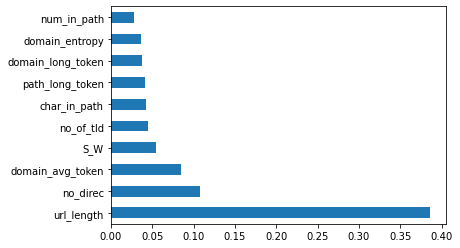

In [5]:
dtree_imp = pd.Series(dtree.feature_importances_,index=features).sort_values(ascending=False).nlargest(10).plot(kind='barh')

In [6]:
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': dtree_pred.flatten()})
error2.head(10) #try for linear

,Actual-Values,Predicted-Values
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


TN 10964
FP 683
FN 1149
TP 8744
FPR 0.05864171031166824
FNR 0.11614272718083493
Accuracy 0.9149489322191272
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11647
           1       0.93      0.88      0.91      9893

    accuracy                           0.91     21540
   macro avg       0.92      0.91      0.91     21540
weighted avg       0.92      0.91      0.91     21540



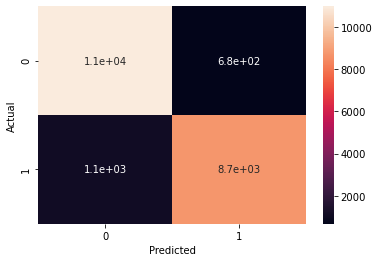

In [7]:
# Plotting a confusion matrix
CM = confusion_matrix (y_test, dtree_pred)
ac = accuracy_score(y_test,dtree_pred)
print ('TN',CM[0][0])
print ('FP',CM[0][1])
print ('FN',CM[1][0])
print ('TP',CM[1][1])
print('FPR', CM[0][1]/(CM[0][1]+CM[0][0]))
print('FNR', CM[1][0]/(CM[1][0]+CM[1][1]))
print('Accuracy',ac)
# Getting the other measures
report = classification_report(y_test,dtree_pred)  
 
print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model for future testing 
#dump(dtree,'../TrainedModels/DecisionTree.joblib')

In [8]:
features = [f for f in df]

In [14]:
from sklearn import tree
from dtreeviz.trees import *


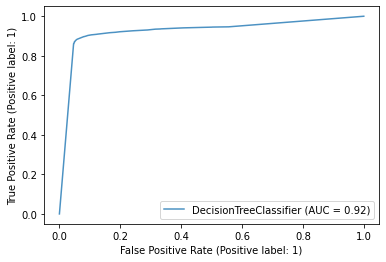

In [15]:
ax = plt.gca()
dtree_disp = plot_roc_curve(dtree, x_test, y_test, ax=ax, alpha=0.8)


TN 9945
FP 56
FN 166
TP 1639
FPR 0.005599440055994401
FNR 0.09196675900277008
Accuracy 0.9811960020328646
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10001
           1       0.97      0.91      0.94      1805

    accuracy                           0.98     11806
   macro avg       0.98      0.95      0.96     11806
weighted avg       0.98      0.98      0.98     11806



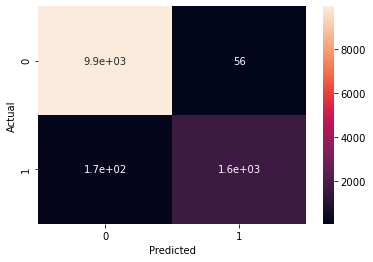

In [16]:
from joblib import load

dtree = load('DecisionTree.joblib')
u_data = pd.read_csv('unseen.csv')

u_data.drop(['URL'], 1, inplace = True)
y_test = u_data['malicious']
x_test = u_data.drop(['malicious'],1)
dtree_predict = dtree.predict(x_test)

CM = confusion_matrix (y_test, dtree_predict)
ac = accuracy_score(y_test,dtree_predict) 
print ('TN',CM[0][0])
print ('FP',CM[0][1])
print ('FN',CM[1][0])
print ('TP',CM[1][1])
print('FPR', CM[0][1]/(CM[0][1]+CM[0][0]))
print('FNR', CM[1][0]/(CM[1][0]+CM[1][1]))
print('Accuracy',ac)
# Getting the other measures
report = classification_report(y_test,dtree_predict)  
print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

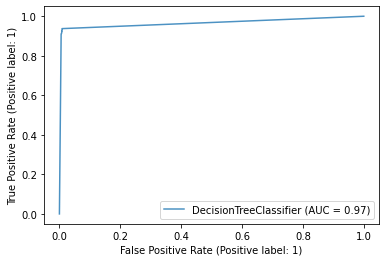

In [17]:
ax = plt.gca()
dtree_disp = plot_roc_curve(dtree, x_test, y_test, ax=ax, alpha=0.8)